# QTM 385

> 
> Matplotlib
>

# Matplotlib

Matplotlib is the main package for data visualization in Python.

To create a data visualization with matplotlib, we need to load the data into Python. We will work here with the datasets `uspop`, `tips` and `PErisk`.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the datasets

# US Population
uspop = pd.read_csv('https://raw.githubusercontent.com/umbertomig/qtm151/main/datasets/uspop.csv', parse_dates = ['year'])
uspop = uspop.set_index('year')

# Political and Economic Risk
perisk = pd.read_csv('https://raw.githubusercontent.com/umbertomig/qtm151/main/datasets/PErisk.csv')
perisk = perisk.set_index('country')

# Tips
tips = pd.read_csv('https://raw.githubusercontent.com/umbertomig/qtm151/main/datasets/tips.csv')

**Exercise**: Check the head of the datasets. What do we have in each of them?

In [2]:
uspop.head() ## Time Series data

,uspop
year,
1790-01-01,3.93
1800-01-01,5.31
1810-01-01,7.24
1820-01-01,9.64
1830-01-01,12.90


In [3]:
perisk.head() ## Country is the index of the dataset

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.690170
Australia,1,-6.907755,5,4,10.304840
Austria,1,-4.910337,5,4,10.100940
Bangladesh,0,0.775975,1,0,8.379768
Belgium,1,-4.617344,5,4,10.250120


In [4]:
tips.head() ## Same as last class

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


## Lineplots

The default plot done by matplotlib is the lineplot. This type of plot is well suited for displaying time-series data, such as stock prices or country populations. Let's check how it works:

* Lineplots plot time on x axis and the dependent variable on y

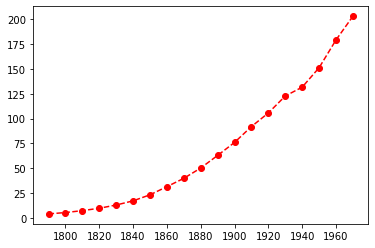

In [5]:
# My code here

# Creating a tuple
fig, ax = plt.subplots()

# # Creating the basic plot
# ax.plot(uspop.index, uspop['uspop'])

# # Making the line red
# ax.plot(uspop.index, uspop['uspop'], color = 'red')

# Spicing up graph with marker and linestyle
ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')
plt.show()

### Set Label Text

We can add labels using `set_xlabel` and `set_ylabel`.

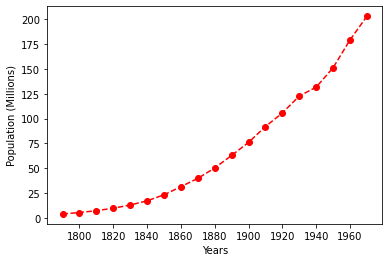

In [6]:
# My code here
fig, ax = plt.subplots()
ax.plot(uspop.index, uspop['uspop'], color = 'red', marker = 'o', linestyle = '--')
ax.set_xlabel('Years')
ax.set_ylabel('Population (Millions)')
plt.show()

### Two plots in the same graph

Now, let us create the log of the population and add to the data:

In [7]:
# My code here
uspop['logpop'] = np.log(uspop['uspop'])
uspop.head()

,uspop,logpop
year,,
1790-01-01,3.93,1.368639
1800-01-01,5.31,1.669592
1810-01-01,7.24,1.979621
1820-01-01,9.64,2.265921
1830-01-01,12.90,2.557227


We can put the plots together, changing the scale in the left and right hand sides. This is very useful to plot time series that have different axis values:

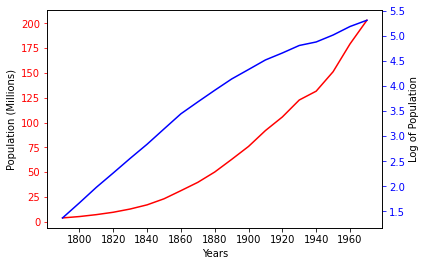

In [8]:
# My code here
fig, ax = plt.subplots()
ax.plot(uspop.index, uspop['uspop'], color = 'red')
ax.set_ylabel('Population (Millions)')
ax.tick_params('y', colors = 'red')

ax2 = ax.twinx()
ax2.plot(uspop.index, uspop['logpop'], color = 'blue')
ax2.set_ylabel('Log of Population')
ax2.tick_params('y', colors = 'blue')

ax.set_xlabel('Years')

plt.show()


## Bar-Charts
* Discrete variables and their frequencies

Bar-plots are useful to see the frequency in variables:

In [9]:
# My code here
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2
country,,,,,
Argentina,0,-0.720775,1,3,9.690170
Australia,1,-6.907755,5,4,10.304840
Austria,1,-4.910337,5,4,10.100940
Bangladesh,0,0.775975,1,0,8.379768
Belgium,1,-4.617344,5,4,10.250120


In [10]:
perisk['expr_risk'] = 5 - perisk['prsexp2']

In [11]:
perisk.head()

,courts,barb2,prsexp2,prscorr2,gdpw2,expr_risk
country,,,,,,
Argentina,0,-0.720775,1,3,9.690170,4
Australia,1,-6.907755,5,4,10.304840,0
Austria,1,-4.910337,5,4,10.100940,0
Bangladesh,0,0.775975,1,0,8.379768,4
Belgium,1,-4.617344,5,4,10.250120,0


In [12]:
tab = perisk['expr_risk'].value_counts(sort = False, normalize = True)
tab

0    0.225806
1    0.225806
2    0.306452
3    0.112903
4    0.096774
5    0.032258
Name: expr_risk, dtype: float64

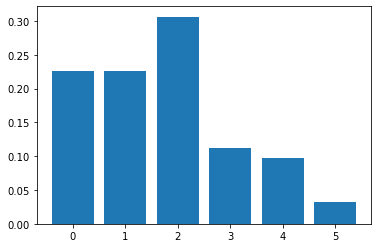

In [13]:
fig, ax = plt.subplots()

ax.bar(tab.index, tab)

plt.show()

**Exercise**: Do the same bar-chart with weekdays in the `tips` dataset.

In [14]:
tips.head()

,obs,totbill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,F,No,Sun,Night,2
1,2,10.34,1.66,M,No,Sun,Night,3
2,3,21.01,3.50,M,No,Sun,Night,3
3,4,23.68,3.31,M,No,Sun,Night,2
4,5,24.59,3.61,F,No,Sun,Night,4


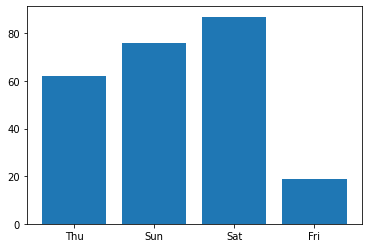

In [15]:
fig, ax = plt.subplots()
tab = tips['day'].value_counts(sort = False)
ax.bar(tab.index, tab)
plt.show()

## Histograms
* For continuous data

To visualize numeric variables, the histogram is the best plot. For instance, here is a histogram of the log of gdp:

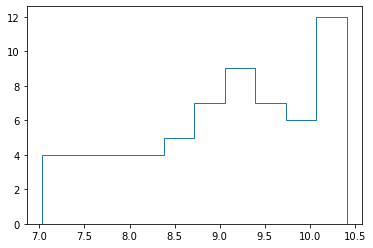

In [16]:
# My code here
fig, ax = plt.subplots()

ax.hist(perisk['gdpw2'], bins = 10, histtype = 'step')

plt.show()

We can even add multiple variables to our plot:

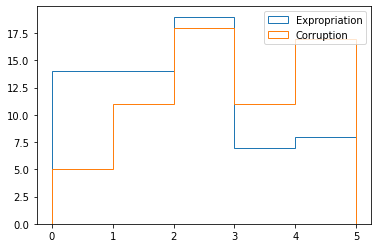

In [17]:
# My code here
fig, ax = plt.subplots()

ax.hist(perisk['expr_risk'], bins = 5, histtype = 'step', label = 'Expropriation')
ax.hist(perisk['prscorr2'], bins = 5, histtype = 'step', label = 'Corruption')

ax.legend()
plt.show()

**Exercise**: Create a histogram of tips and total bill.

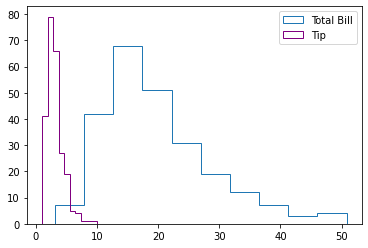

In [18]:
# Your code here

fig, ax = plt.subplots()

ax.hist(tips['totbill'], bins = 10, histtype = 'step', label = 'Total Bill')
ax.hist(tips['tip'], bins = 10, histtype = 'step', label = 'Tip', color = 'purple')

ax.legend()
plt.show()

## Box-plots

To visualize numeric variables, the box-plots are also great plots:

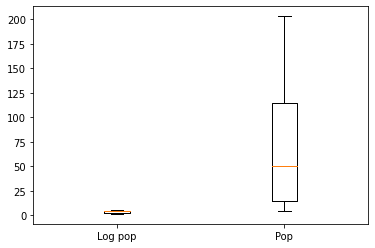

In [19]:
# My code here
fig, ax = plt.subplots()

ax.boxplot([uspop['logpop'], uspop['uspop']]) ## Terrible looking because their scales are different
ax.set_xticklabels(['Log pop', 'Pop'])
plt.show()

**Exercise**: Create a boxplot of tips and total bill.

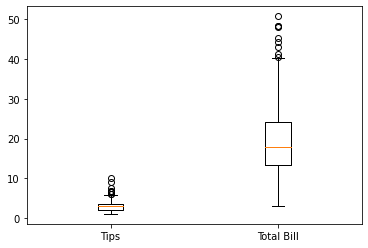

In [20]:
## Your code here
fig, ax = plt.subplots()

ax.boxplot([tips['tip'], tips['totbill']])
ax.set_xticklabels(['Tips', 'Total Bill'])

plt.show()

## Scatter-plots

Scatter-plots are great to display numeric x numeric relationships.

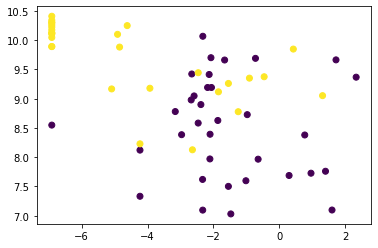

In [21]:
# My code here
fig, ax = plt.subplots()

ax.scatter(x = perisk['barb2'], y = perisk['gdpw2'], c = perisk['courts'])
# We added color, but it looks like overkill
# Make sure that coloring the graph adds to your explanation, and isn't random!
plt.show()

**Exercise**: Plot a scatter of total bill x tip in the tips dataset. Then color by the size.

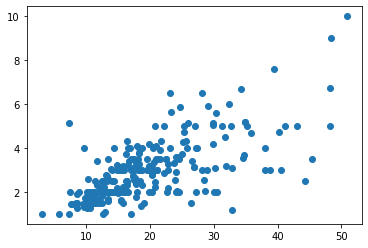

In [22]:
## Your code here
fig, ax=plt.subplots()

ax.scatter(x = tips['totbill'], y = tips['tip'])

plt.show()

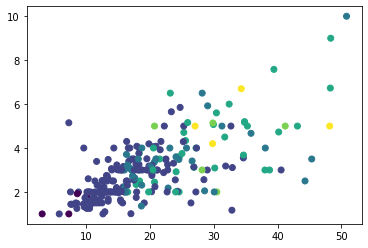

In [23]:
## Your code here
fig, ax=plt.subplots()

ax.scatter(x = tips['totbill'], y = tips['tip'], c = tips['size'])

plt.show()

**Great job!!!**

#### Final Notes

Send data to R and view them using ggplot instead!

Using Python is usually just to see the data quickly.

Matplotlib has tons of plots! Explore them